# Change Point Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from change_point import ModifiedSDNML
import datetime as dt
import time
import os

## Read Reconstruction Error

In [2]:
folder = 'reconstruct_error/' # the folder is generated by 1D-CAE Tester.ipynb
files = os.listdir(folder)
df_list = []
for file in files:
    if (file.split('.'))[-1] != 'csv':
        continue
    name, _ = os.path.splitext(file)
    filePath = folder + file
    df = pd.read_csv(filePath,index_col=0)
    df = pd.DataFrame(df.sum(axis=1))
    df.columns = [(file.split('.'))[0]]
    df_list.append(df.copy())
rec_df = pd.concat(df_list,axis=1)

In [3]:
rec_df.head()

,zone8,zone2,zone3,zone1,zone4,zone10,zone7,zone5,zone9,zone6
2019-01-02 00:00:00,0.007539,0.003881,0.007432,0.002580,0.008704,0.010684,0.010613,0.007003,0.009190,0.011530
2019-01-02 00:05:00,0.006736,0.003606,0.008149,0.002573,0.008775,0.009152,0.007471,0.006880,0.006577,0.012177
2019-01-02 00:10:00,0.008601,0.002972,0.006320,0.002401,0.008767,0.011838,0.008497,0.006977,0.005998,0.010471
2019-01-02 00:15:00,0.009175,0.003102,0.007049,0.002212,0.006427,0.009389,0.006917,0.006604,0.007409,0.009488
2019-01-02 00:20:00,0.007640,0.003668,0.007227,0.002331,0.008588,0.011727,0.010004,0.007479,0.007364,0.011244


## Read Leak Flow Data

In [4]:
leak_df = pd.read_csv('./data/l-town-data/2019_Leakages.csv',decimal=',',sep=';',index_col='Timestamp')

In [5]:
leak_df = leak_df[rec_df.index[0]:]
leak_df.head()

,p123,p142,p193,p257,p277,p280,p331,p426,p427,p455,...,p653,p654,p680,p710,p721,p762,p800,p810,p827,p879
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,0.0,0.0,0.0,6.78,0.0,0.0,0.0,0.0,5.05,0.0,...,0.0,5.45,0.0,0.0,0.0,0.0,0.0,6.87,0.0,0.0
2019-01-02 00:05:00,0.0,0.0,0.0,6.78,0.0,0.0,0.0,0.0,5.05,0.0,...,0.0,5.45,0.0,0.0,0.0,0.0,0.0,6.87,0.0,0.0
2019-01-02 00:10:00,0.0,0.0,0.0,6.78,0.0,0.0,0.0,0.0,5.06,0.0,...,0.0,5.45,0.0,0.0,0.0,0.0,0.0,6.87,0.0,0.0
2019-01-02 00:15:00,0.0,0.0,0.0,6.78,0.0,0.0,0.0,0.0,5.05,0.0,...,0.0,5.45,0.0,0.0,0.0,0.0,0.0,6.86,0.0,0.0
2019-01-02 00:20:00,0.0,0.0,0.0,6.79,0.0,0.0,0.0,0.0,5.06,0.0,...,0.0,5.45,0.0,0.0,0.0,0.0,0.0,6.87,0.0,0.0


In [6]:
# Leak Pipes in Each Zone
leak_info = {'zone1':['p277','p280'], 
             'zone2':['p331','p426'], 
             'zone3':['p710','p721'],
             'zone4':['p800','p879'],
             'zone5':['p827','p193','p762'],
             'zone6':['p680'],
             'zone7':['p653','p142','p123'],
             'zone8':['p523','p514','p586'],
             'zone9':['p455'],
             'zone10':[]}

In [7]:
time_stamp = list(pd.date_range(start=rec_df.index[0], periods=len(rec_df), freq='5min'))

In [8]:
scores = {}
for key in leak_info:
    st = time.time()
    f = ModifiedSDNML(discounting_param=0.1, order=288)
    dt = np.array(rec_df[key])
    scores[key] = list(f.score(dt))
    print(f'{key}: complete. time: {time.time()-st}')

zone1: complete. time: 63.88214683532715
zone2: complete. time: 63.10466027259827
zone3: complete. time: 61.0450177192688
zone4: complete. time: 60.91545653343201
zone5: complete. time: 61.84636306762695
zone6: complete. time: 60.74462103843689
zone7: complete. time: 61.92443323135376
zone8: complete. time: 60.709452867507935
zone9: complete. time: 61.98964595794678
zone10: complete. time: 60.55721879005432


## Save anomaly score

In [9]:
score_df = pd.DataFrame(scores, index=rec_df.index)

In [10]:
score_df.to_csv('./anomaly_score/score.csv',index=True) # Save anomaly score

## Anomaly detection

In [11]:
score_df = pd.read_csv('./anomaly_score/score.csv', index_col=0)

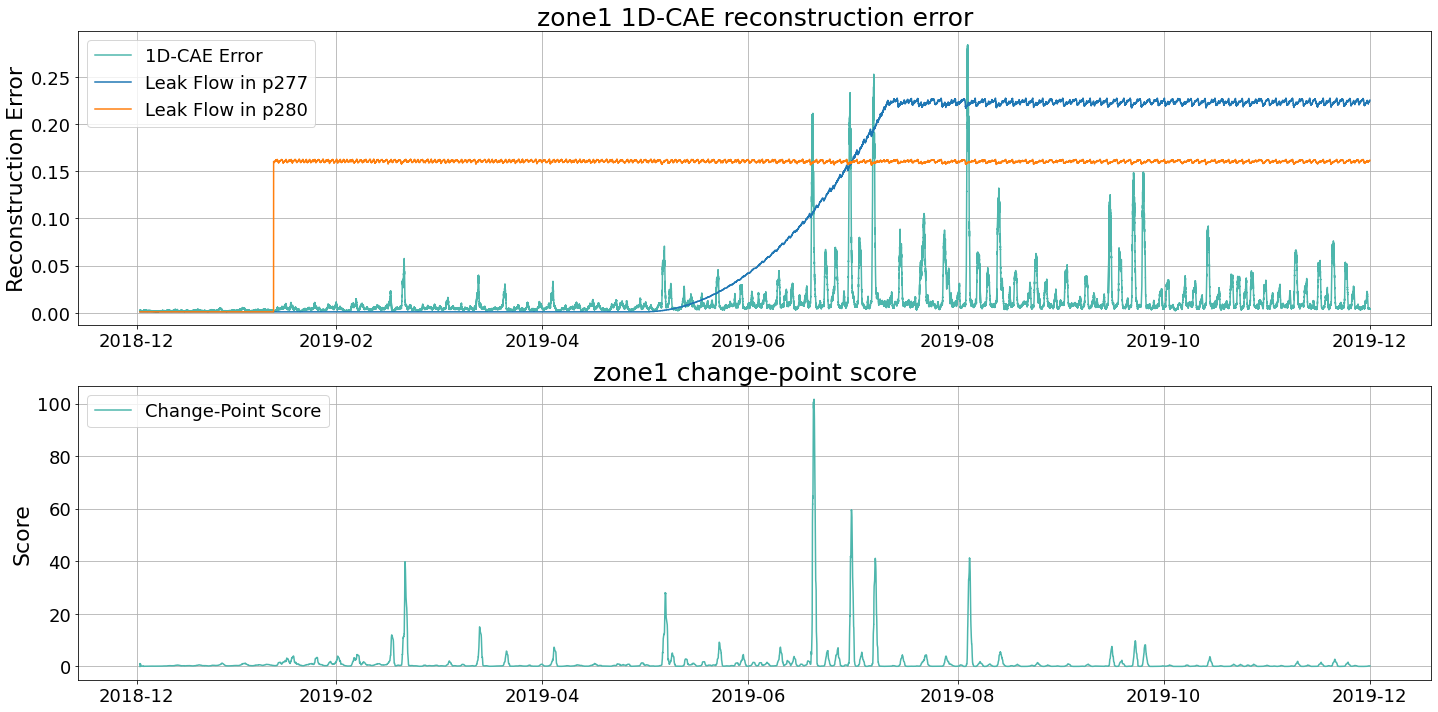

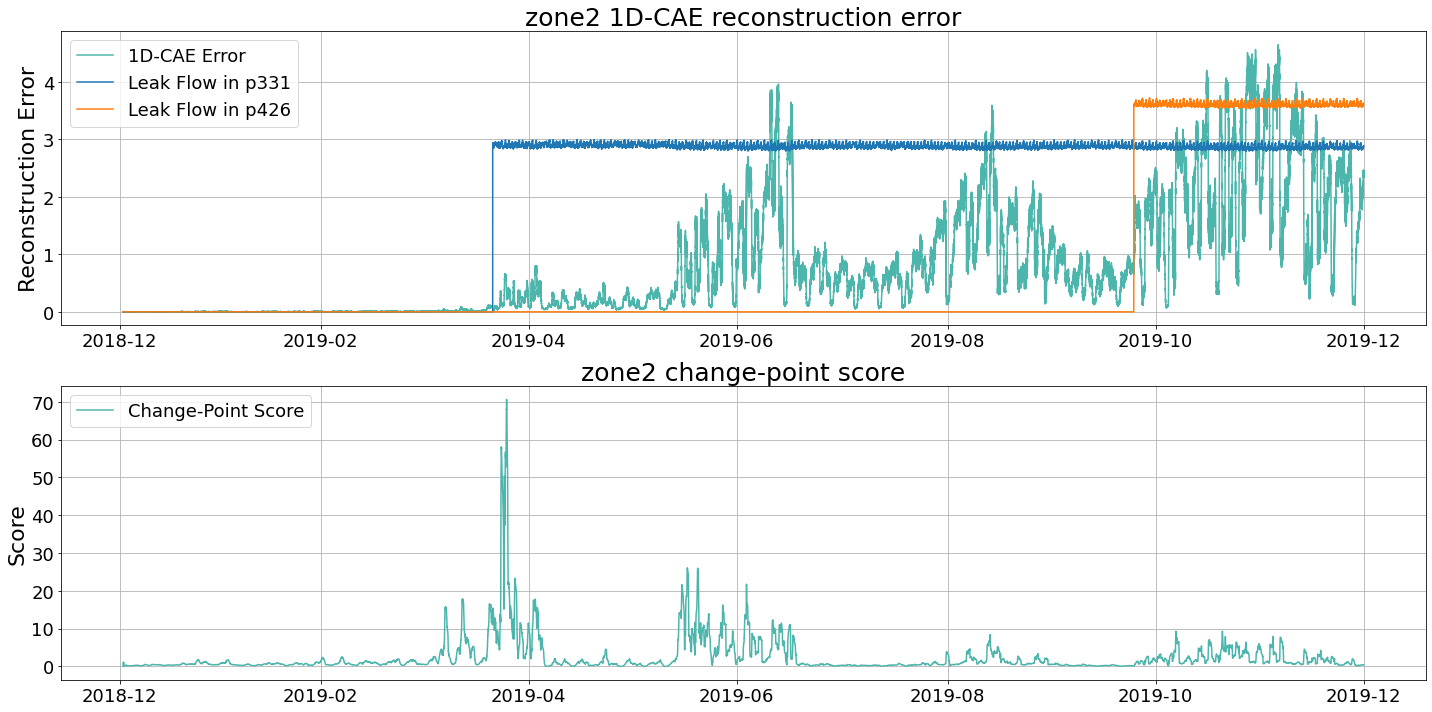

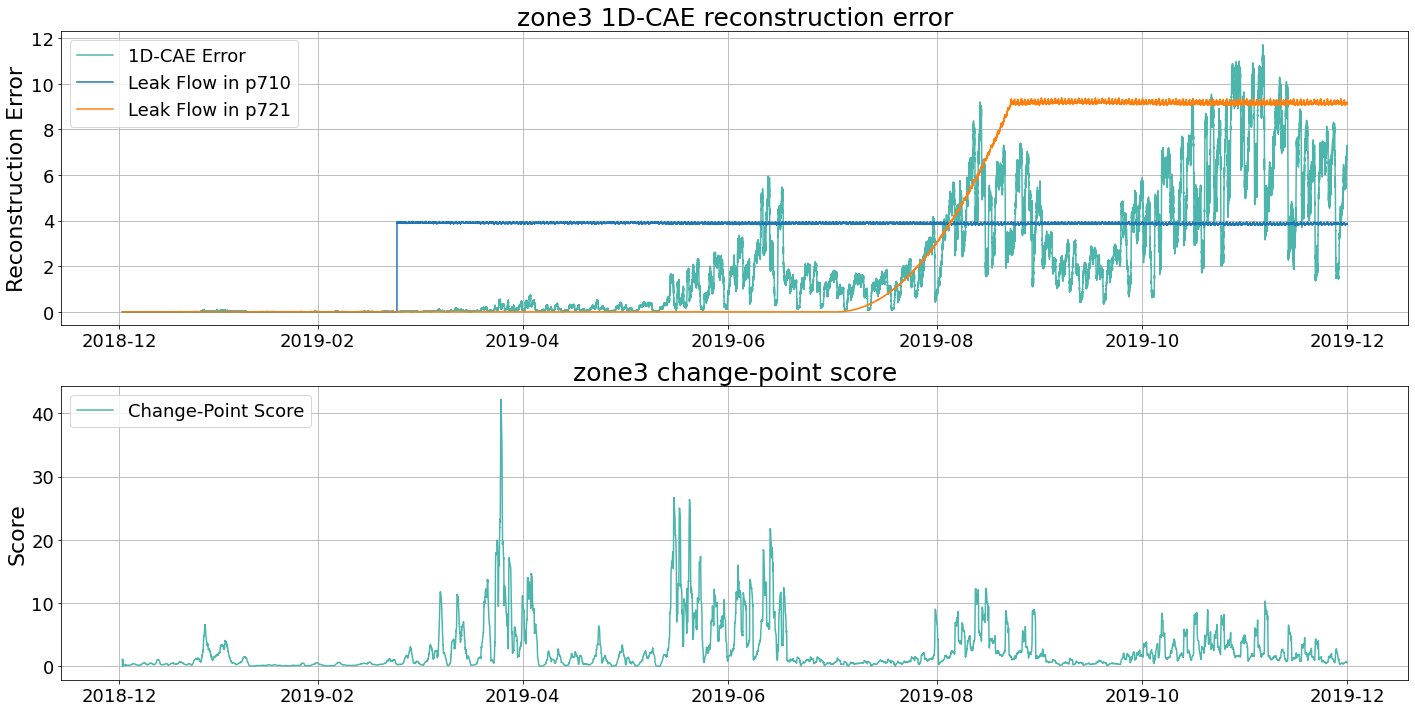

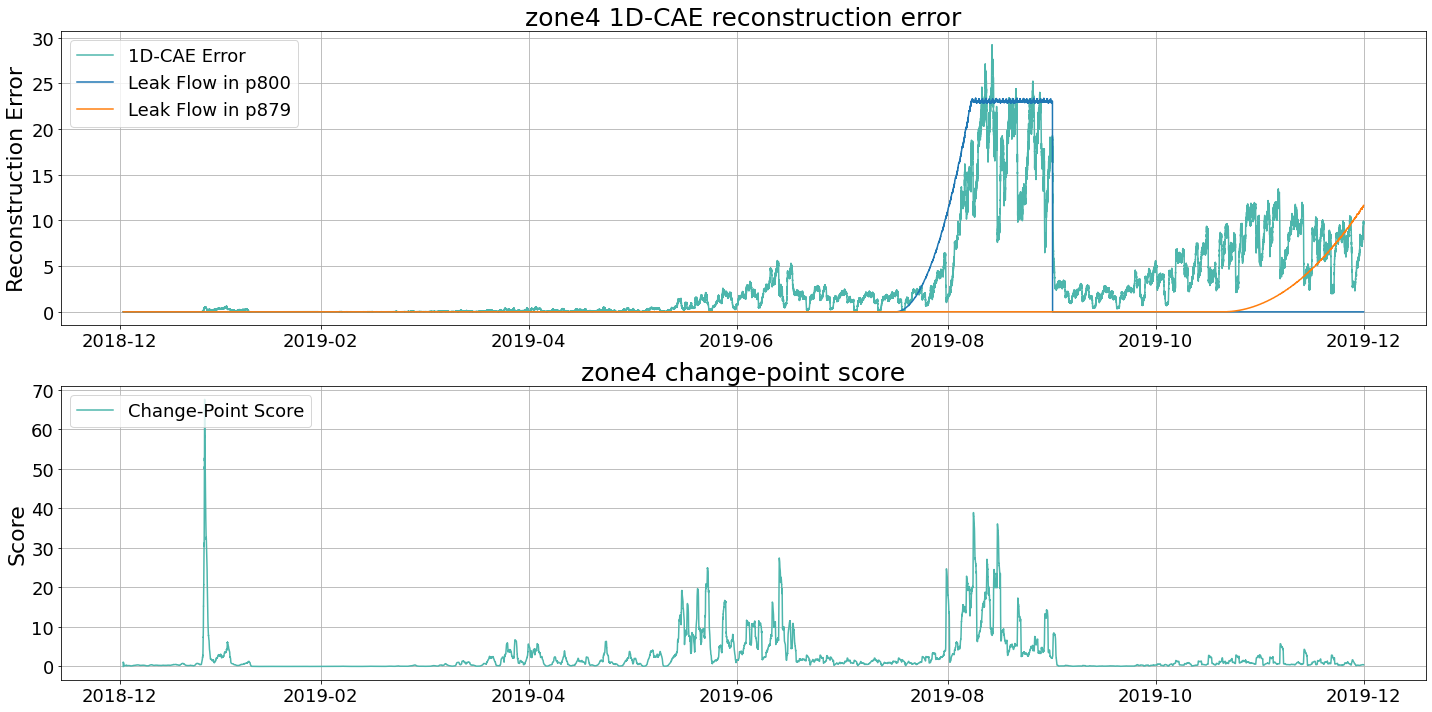

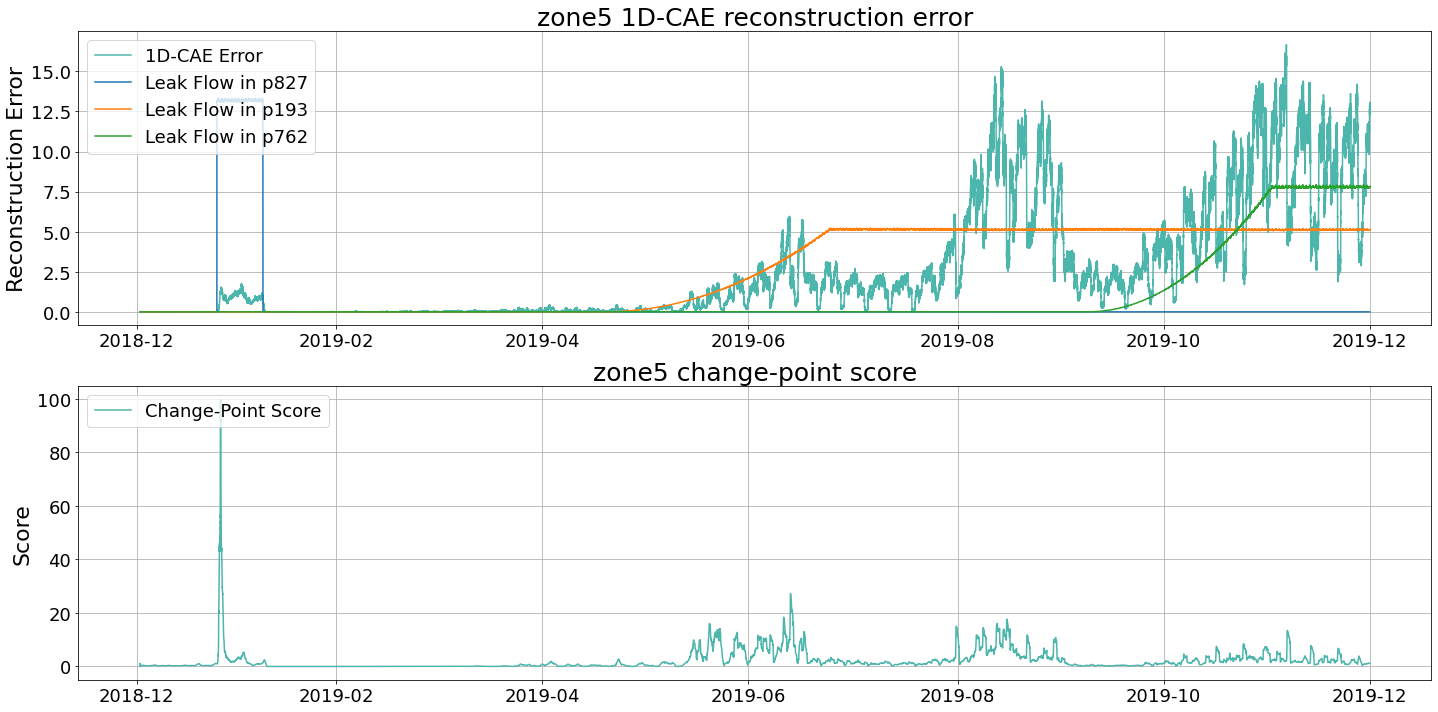

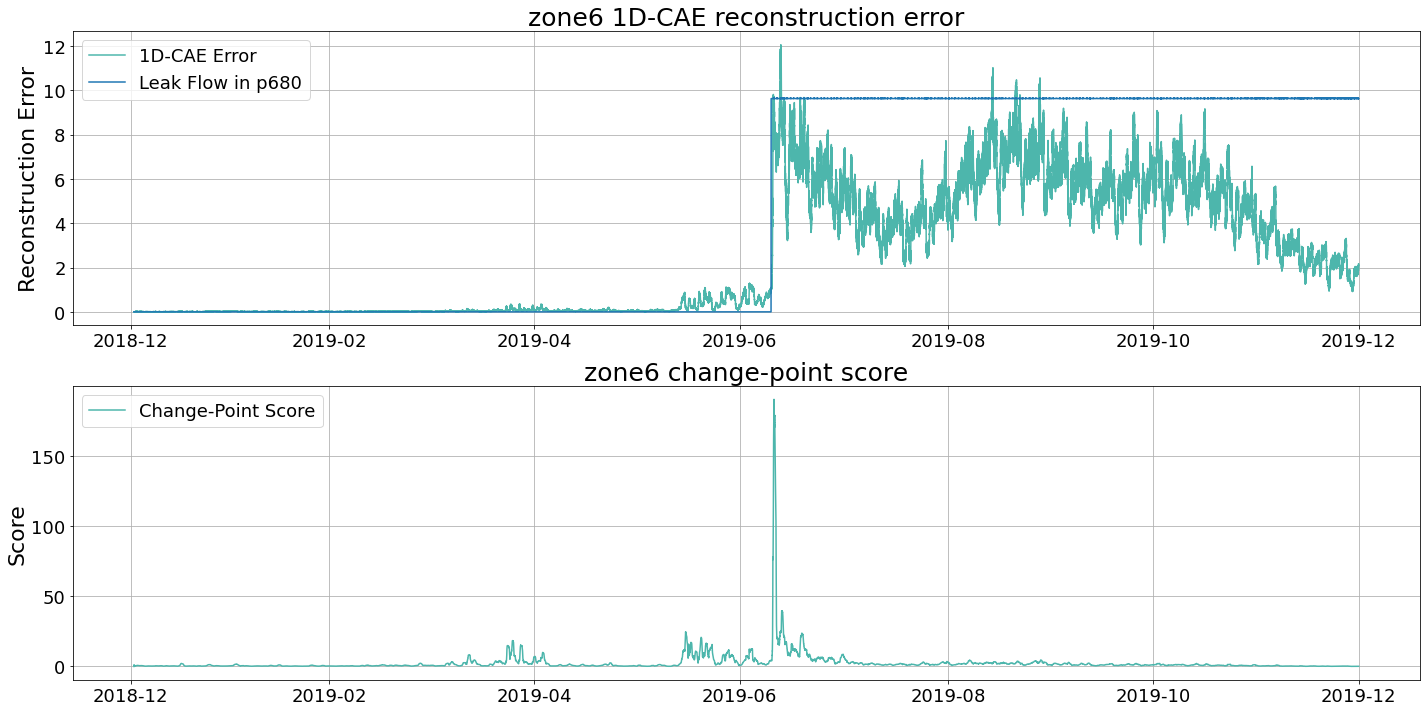

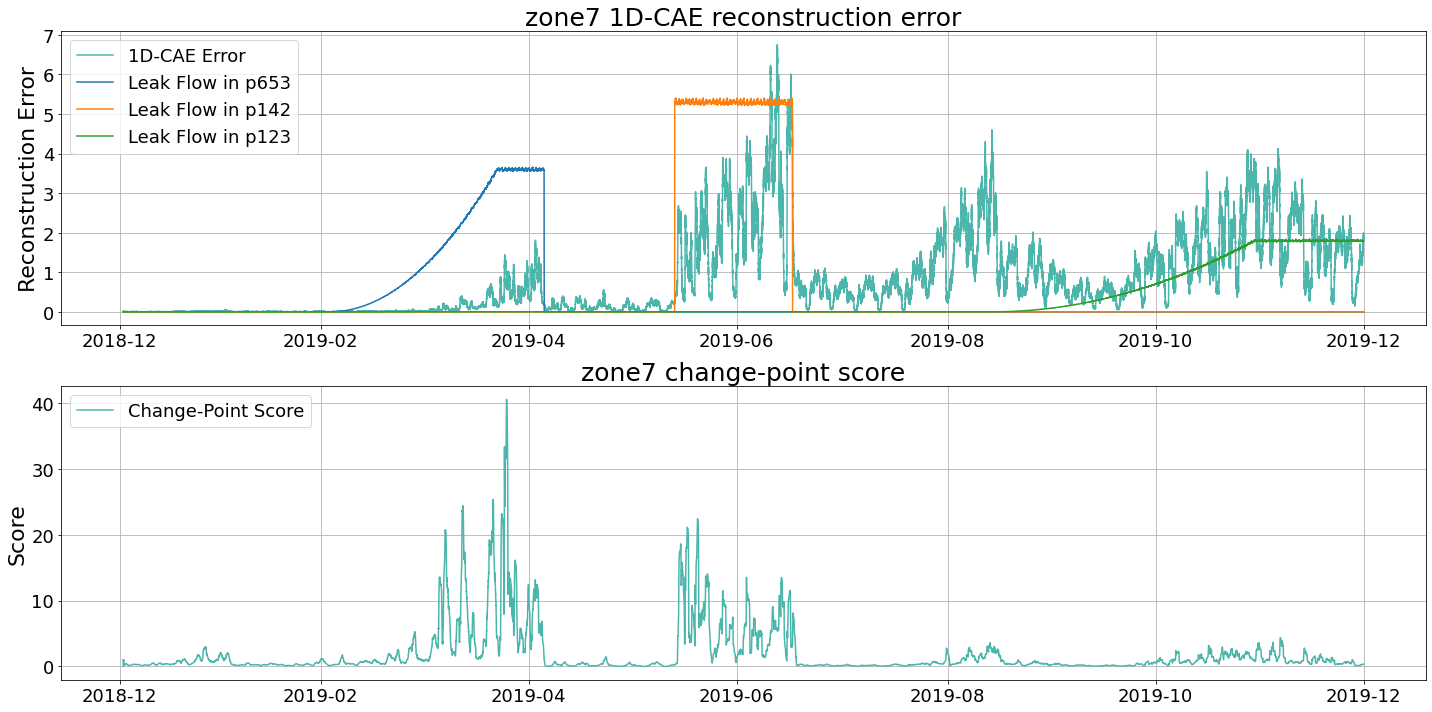

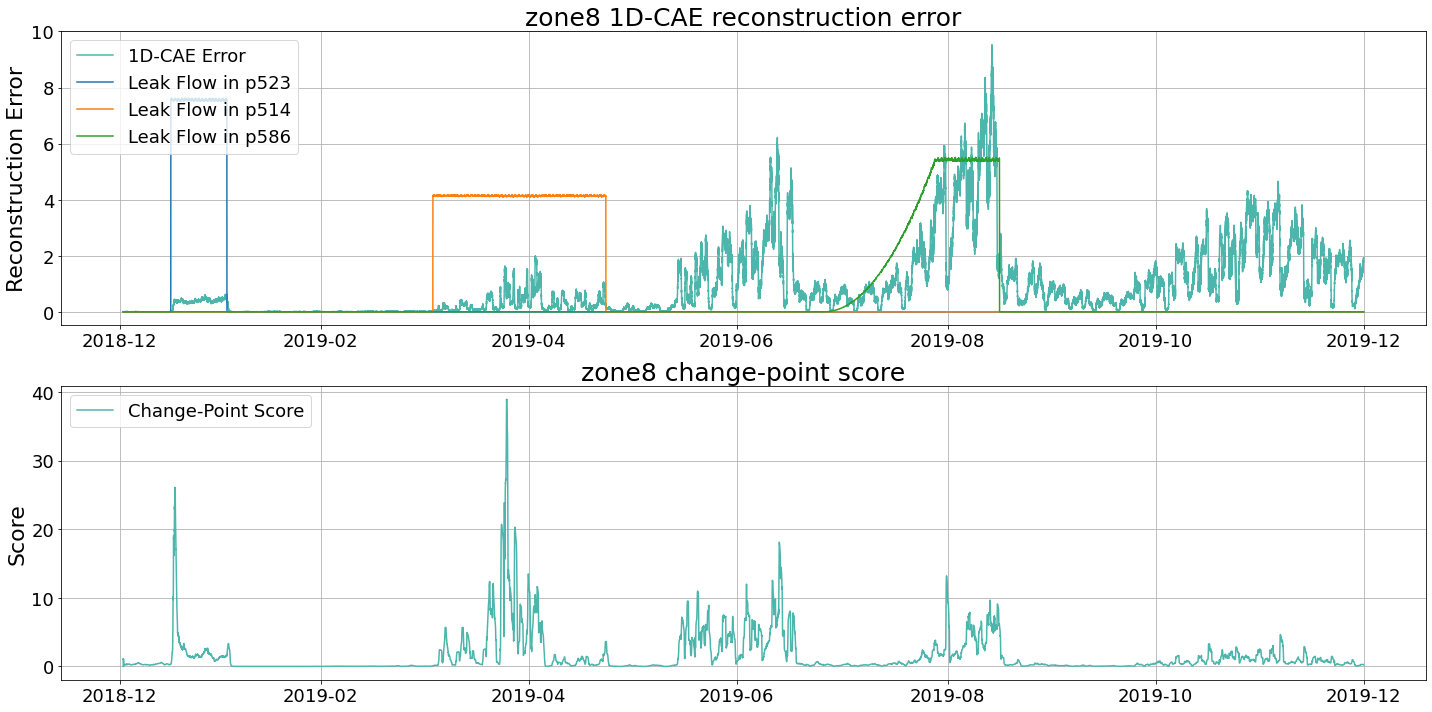

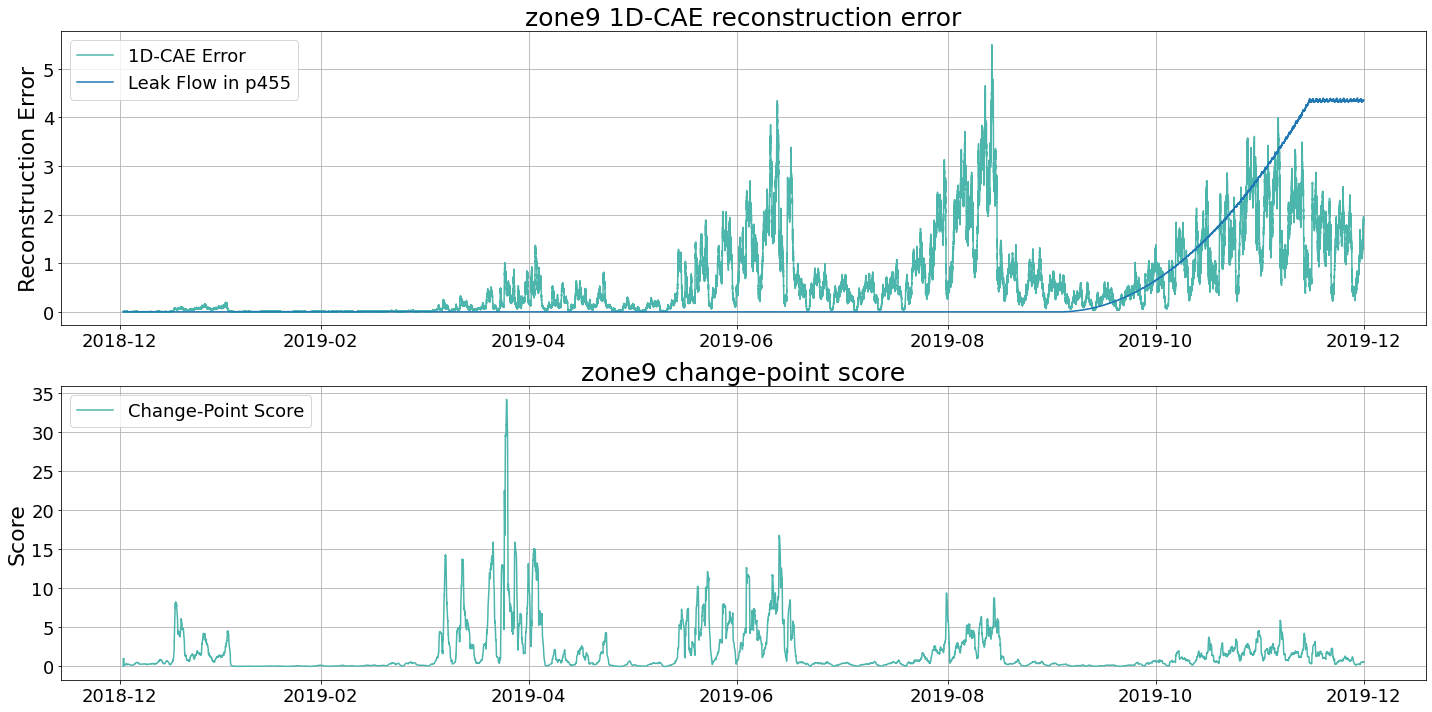

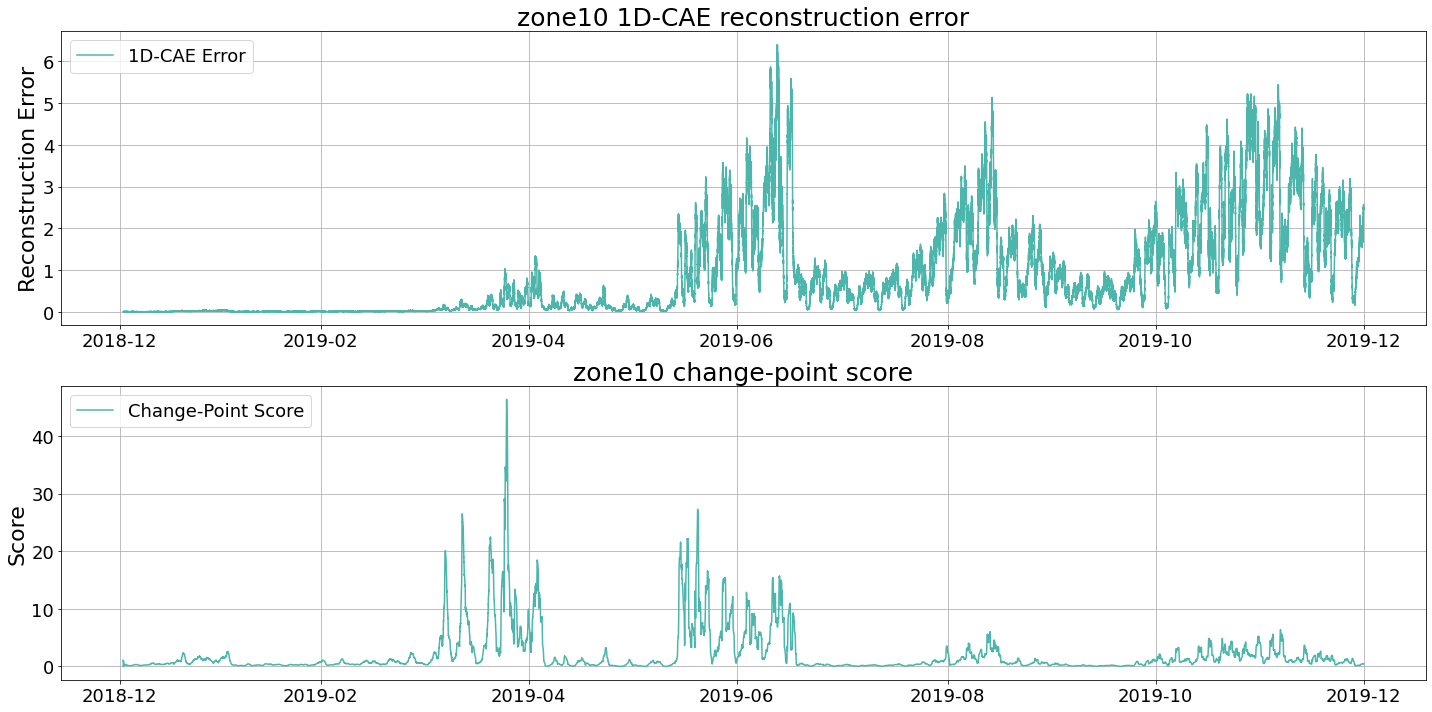

In [13]:
for key in leak_info:
    dt = np.array(rec_df[key])
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10), tight_layout=True)
    axes[0].set_title(f'{key} 1D-CAE reconstruction error', fontsize=25)
    axes[0].plot(time_stamp, dt, color='#4DB6AC', label=f'1D-CAE Error')
    
    max_scad, min_scad = max(dt), min(dt)
    max_leak = max([max(leak_df[j]) for j in leak_info[key]]) if len(leak_info[key])>0 else 0
    for pipe_i in leak_info[key]:
        axes[0].plot(time_stamp, min_scad + leak_df[pipe_i]*(max_scad-min_scad)*0.8/max_leak, label=f'Leak Flow in {pipe_i}')

    axes[1].set_title(f'{key} change-point score', fontsize=25)
    axes[1].plot(time_stamp, scores[key], color='#4DB6AC', label='Change-Point Score')
    
    axes[0].tick_params(axis='x', labelsize=18)
    axes[0].tick_params(axis='y', labelsize=18)
    axes[1].tick_params(axis='x', labelsize=18)
    axes[1].tick_params(axis='y', labelsize=18)
    
    axes[0].set_ylabel('Reconstruction Error', fontsize=22)
    axes[1].set_ylabel('Score', fontsize=22)
    plt.tight_layout()

    axes[0].legend(fontsize=18, loc='upper left')
    axes[1].legend(fontsize=18, loc='upper left')
    axes[0].grid()
    axes[1].grid()
    plt.show()

In [14]:
# Leak start time and end time
start_time = {'zone1': ['2019-02-10 13:05', '2019-05-30 21:55'],
              'zone2': ['2019-04-20 10:10', '2019-10-25 13:25'],
              'zone3': ['2019-03-24 14:15', '2019-08-02 03:00'],
              'zone4': ['2019-08-16 14:00', '2019-11-20 11:55'],
              'zone5': ['2019-01-24 18:30', '2019-05-19 10:40', '2019-10-09 10:15'],
              'zone6': ['2019-07-10 08:45'],
              'zone7': ['2019-03-03 13:10', '2019-06-12 19:55', '2019-09-13 20:05'],
              'zone8': ['2019-01-15 23:00', '2019-04-02 20:40', '2019-07-26 14:40'],
              'zone9': ['2019-10-03 14:00'],
              'zone10': []}

end_time = {'zone1': ['2019-12-31 23:55', '2019-12-31 23:55'],
            'zone2': ['2019-12-31 23:55', '2019-12-31 23:55'],
            'zone3': ['2019-12-31 23:55', '2019-12-31 23:55'],
            'zone4': ['2019-10-01 16:35', '2019-12-31 23:55'],
            'zone5': ['2019-02-07 09:05', '2019-12-31 23:55', '2019-12-31 23:55'],
            'zone6': ['2019-12-31 23:55'],
            'zone7': ['2019-05-05 12:10', '2019-07-17 09:25', '2019-12-31 23:55'],
            'zone8': ['2019-02-01 09:50', '2019-05-23 14:55', '2019-09-16 03:20'],
            'zone9': ['2019-12-31 23:55'],
            'zone10': []}

In [15]:
score_max = score_df[:'2019-01-14 23:55:00'].max()

In [16]:
def leak_corr(score_df, interval, k):
    alarm_df = pd.DataFrame(index=score_df.index)
    complete_alarm = pd.DataFrame(index=score_df.index)
    for i, key in enumerate(score_df.columns):
        tmp = score_df[key].copy()
        thd = score_max[key]*k
        tmp[tmp<thd] = 0
        tmp[tmp>=thd] = 1
        complete_alarm[key] = tmp
        tmp = (tmp.shift(-1) - tmp).shift(1)
        alarm_df[key] = tmp
    alarm_df.fillna(0, inplace=True)
    alarm_df.replace(-1, 0, inplace=True)
    
    return alarm_df, complete_alarm


def analysis(score_df, i):
    tmp = score_df[i].copy()
    abnml_idx = tmp[tmp == 1].index.tolist()
    detect_list = []

    # true detection false detection
    if i not in start_time:
        print(f'Accuracy of Leak Event Detected: 0/0')
        return {'tp': 0, 'fp': len(abnml_idx), 'detect': 0, 'all': 0}
    leak_event_marked = [0]*len(start_time[i])
    alarms = [0]*len(abnml_idx)
    for j, idx in enumerate(abnml_idx):
        for k, (st, ed) in enumerate(zip(start_time[i], end_time[i])):
            if st <= idx <= ed:
                alarms[j] = 1
                if leak_event_marked[k]==0:
                    print(f'Detect: {idx}. Delay: {pd.Timestamp(idx)-pd.Timestamp(st)}')
                    detect_list.append(idx)
                    leak_event_marked[k]=1
    print(f'Accuracy of Leak Event Detected: {sum(leak_event_marked)}/{len(leak_event_marked)}')
    return {'tp': sum(alarms), 'fp': len(alarms)-sum(alarms), 'detect': sum(leak_event_marked), 'all': len(leak_event_marked),'detect_list':detect_list}


def printAnalysis(df):
    tp_cnt = fp_cnt = 0
    detect = total = 0
    detect_dict = {}
    for i in df.columns:
        print(f'========== {i} ==========')

        res = analysis(df, i)
        tp_cnt += res['tp']
        fp_cnt += res['fp']
        detect += res['detect']
        total += res['all']
        detect_dict[i] = res['detect_list'] if 'detect_list' in res else []
    print(f'======================')
    print(f'Accuracy of Leak Event Detected: {detect}/{total}')
    return detect_dict

In [17]:
alarm_df, complete_alarm = leak_corr(score_df, 2, 4)
detect_dict = printAnalysis(alarm_df)

========== zone1 ==========
Detect: 2019-03-07 05:10:00. Delay: 24 days 16:05:00
Detect: 2019-06-05 15:15:00. Delay: 5 days 17:20:00
Accuracy of Leak Event Detected: 2/2
========== zone2 ==========
Detect: 2019-04-28 01:30:00. Delay: 7 days 15:20:00
Detect: 2019-11-06 12:20:00. Delay: 11 days 22:55:00
Accuracy of Leak Event Detected: 2/2
========== zone3 ==========
Detect: 2019-04-06 01:00:00. Delay: 12 days 10:45:00
Detect: 2019-08-31 10:50:00. Delay: 29 days 07:50:00
Accuracy of Leak Event Detected: 2/2
========== zone4 ==========
Detect: 2019-08-31 08:25:00. Delay: 14 days 18:25:00
Detect: 2019-12-07 11:15:00. Delay: 16 days 23:20:00
Accuracy of Leak Event Detected: 2/2
========== zone5 ==========
Detect: 2019-01-25 03:35:00. Delay: 0 days 09:05:00
Detect: 2019-06-14 00:25:00. Delay: 25 days 13:45:00
Detect: 2019-11-06 21:10:00. Delay: 28 days 10:55:00
Accuracy of Leak Event Detected: 3/3
========== zone6 ==========
Detect: 2019-07-10 15:05:00. Delay: 0 days 06:20:00
Accuracy of Lea

## Filter alarm

In [18]:
adj_zone = {
    'zone1': [],
    'zone2': ['zone3', 'zone10'],
    'zone3': ['zone2','zone4','zone5','zone6','zone7','zone10'],
    'zone4': ['zone3','zone5'],
    'zone5': ['zone3','zone4'],
    'zone6': ['zone3'],
    'zone7': ['zone3','zone8','zone10'],
    'zone8': ['zone7','zone9','zone10'],
    'zone9': ['zone8'],
    'zone10': ['zone2','zone3','zone7','zone8']
}

In [19]:
def fp_collect(score_df):
    detect_fp = {}
    for i in score_df.columns:
        tmp = score_df[i].copy()
        abnml_idx = tmp[tmp == 1].index.tolist()
        detect_fp[i] = []
        if i not in start_time:
            for idx in abnml_idx:
                detect_fp[i].append(idx)
            continue
        for j, idx in enumerate(abnml_idx):
            isTP = False
            for k, (st, ed) in enumerate(zip(start_time[i], end_time[i])):
                if pd.Timestamp(st) <= pd.Timestamp(idx) <= pd.Timestamp(ed)+pd.Timedelta(hours=6):
                    isTP = True
            if not isTP:
                detect_fp[i].append(idx)
    return detect_fp

In [20]:
detect_fp = fp_collect(alarm_df)

In [21]:
def filter_fp(new_df, detect_fp):
    filtered_detect_fp = {}
    for key, val in detect_fp.items():
        filtered_detect_fp[key] = []
        for ts in val:
            filtered = False
            nei = [key] + adj_zone[key]
            err = [new_df[_].loc[ts] for _ in nei]
            max_idx = err.index(max(err))
            max_zone = nei[max_idx]
            for k, (st, ed) in enumerate(zip(start_time[max_zone], end_time[max_zone])):
                if st <= ts <= ed:
                    filtered = True
            if not filtered:
                filtered_detect_fp[key].append(ts)
    return filtered_detect_fp

def filter_alarm(complete_alarm, detect_fp):
    alarm_dict = {}
    for i in complete_alarm.columns:
        tmp = complete_alarm[i].copy()
        abnml_idx = tmp[tmp == 1].index.tolist()
        alarm_dict[i] = abnml_idx
    
    filtered_detect_fp = {}
    for key, val in detect_fp.items():
        filtered_detect_fp[key] = []
        neigbors = adj_zone[key]
        
        for ts in val:
            filtered = False
            for nei in neigbors:
                for ts_n in alarm_dict[nei]:
                    if pd.Timedelta(hours=0)<=pd.Timestamp(ts)-pd.Timestamp(ts_n)<pd.Timedelta(days=1):
                        filtered = True
                        break
                if filtered:
                    break
            if not filtered:
                filtered_detect_fp[key].append(ts)
    return filtered_detect_fp

In [26]:
filtered_detect = filter_fp(rec_df, detect_fp)
filtered_detect = filter_alarm(complete_alarm, filtered_detect)

In [27]:
cnt_tmp = 0
for key, val in filtered_detect.items():
    for k in val:
        cnt_tmp += 1
print(f'FP:{cnt_tmp}')

FP:9
